# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}\n")


Number of cities in the list: 608



---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        myResponse = requests.get(city_url).json()
#         pprint(myResponse)
        city_weather = myResponse['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = myResponse['coord']['lat']
        city_lng = myResponse['coord']['lon']
        city_max_temp = myResponse['main']['temp_max']
        city_humidity = myResponse['main']['humidity']
        city_clouds = myResponse['clouds']['all']
        city_wind = myResponse['wind']['speed']
        city_country = myResponse['sys']['country']
        city_date =  myResponse['dt']

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | sao joao da barra
Processing Record 6 of Set 1 | mount pearl
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | kharkhorin
Processing Record 9 of Set 1 | gurupi
Processing Record 10 of Set 1 | isfana
Processing Record 11 of Set 1 | ouarzazat
Processing Record 12 of Set 1 | quellon
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | fort bragg
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | vila velha
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | twon-brass
Processing Record 20 of Set 1 | newman
Processing Record 21 of Set 1 | arkhara
Processing Record 22 of Set 1 | levuka
Processing Record 23 of Set 1 | bilibino
Processing Record 24 o

Processing Record 39 of Set 4 | biograd na moru
Processing Record 40 of Set 4 | pauini
Processing Record 41 of Set 4 | kodiak
Processing Record 42 of Set 4 | gongzhuling
Processing Record 43 of Set 4 | vadso
Processing Record 44 of Set 4 | muli
Processing Record 45 of Set 4 | kachug
Processing Record 46 of Set 4 | alotau
City not found. Skipping...
Processing Record 47 of Set 4 | vilyuchinsk
Processing Record 48 of Set 4 | ji'an
Processing Record 49 of Set 4 | fortuna
Processing Record 0 of Set 5 | charters towers
Processing Record 1 of Set 5 | kasongo-lunda
Processing Record 2 of Set 5 | bayanaul
Processing Record 3 of Set 5 | victorica
Processing Record 4 of Set 5 | sumbe
Processing Record 5 of Set 5 | hastings
Processing Record 6 of Set 5 | shakawe
Processing Record 7 of Set 5 | uliastay
Processing Record 8 of Set 5 | ribeira grande
Processing Record 9 of Set 5 | isangel
Processing Record 10 of Set 5 | moree
Processing Record 11 of Set 5 | puerto aysen
Processing Record 12 of Set 5 

Processing Record 33 of Set 8 | teno
Processing Record 34 of Set 8 | dryden
Processing Record 35 of Set 8 | point pedro
Processing Record 36 of Set 8 | zaozersk
Processing Record 37 of Set 8 | nova sintra
Processing Record 38 of Set 8 | lijiang
Processing Record 39 of Set 8 | kakonko
Processing Record 40 of Set 8 | vernon
Processing Record 41 of Set 8 | buka
Processing Record 42 of Set 8 | manuel ojinaga
City not found. Skipping...
Processing Record 43 of Set 8 | mutoko
Processing Record 44 of Set 8 | langres
Processing Record 45 of Set 8 | recani
Processing Record 46 of Set 8 | thinadhoo
Processing Record 47 of Set 8 | college
Processing Record 48 of Set 8 | khanty-mansiysk
Processing Record 49 of Set 8 | bologoye
Processing Record 0 of Set 9 | anshun
Processing Record 1 of Set 9 | kavaratti
Processing Record 2 of Set 9 | poronaysk
Processing Record 3 of Set 9 | shimoda
Processing Record 4 of Set 9 | tinajo
Processing Record 5 of Set 9 | antalaha
Processing Record 6 of Set 9 | sao gab

Processing Record 23 of Set 12 | es castell
Processing Record 24 of Set 12 | olovyannaya
Processing Record 25 of Set 12 | tiberias
Processing Record 26 of Set 12 | fiambala
Processing Record 27 of Set 12 | baruun-urt
Processing Record 28 of Set 12 | puerto santa
Processing Record 29 of Set 12 | rio gallegos
Processing Record 30 of Set 12 | okahao
Processing Record 31 of Set 12 | mil'kovo
Processing Record 32 of Set 12 | helena-west helena
Processing Record 33 of Set 12 | tavda
Processing Record 34 of Set 12 | talara
Processing Record 35 of Set 12 | okha
Processing Record 36 of Set 12 | huicungo
Processing Record 37 of Set 12 | ubari
Processing Record 38 of Set 12 | cockburn town
Processing Record 39 of Set 12 | ciudad cerralvo
City not found. Skipping...
Processing Record 40 of Set 12 | pudozh
Processing Record 41 of Set 12 | novozybkov
Processing Record 42 of Set 12 | faya-largeau
Processing Record 43 of Set 12 | butterworth
Processing Record 44 of Set 12 | jaguarari
Processing Record

In [5]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df=pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Edinburgh Of The Seven Seas,-37.0676,-12.3116,15.72,90,13,8.25,SH,1701692749
1,Hamilton,39.1834,-84.5333,2.47,93,75,2.57,US,1701692744
2,Adamstown,-25.0660,-130.1015,22.29,81,29,5.12,PN,1701692750
3,Punta Arenas,-53.1500,-70.9167,11.06,66,75,9.26,CL,1701692751
4,Sao Joao Da Barra,-21.6403,-41.0511,31.05,80,97,6.40,BR,1701692752


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Edinburgh Of The Seven Seas,-37.0676,-12.3116,15.72,90,13,8.25,SH,1701692749
1,Hamilton,39.1834,-84.5333,2.47,93,75,2.57,US,1701692744
2,Adamstown,-25.0660,-130.1015,22.29,81,29,5.12,PN,1701692750
3,Punta Arenas,-53.1500,-70.9167,11.06,66,75,9.26,CL,1701692751
4,Sao Joao Da Barra,-21.6403,-41.0511,31.05,80,97,6.40,BR,1701692752


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

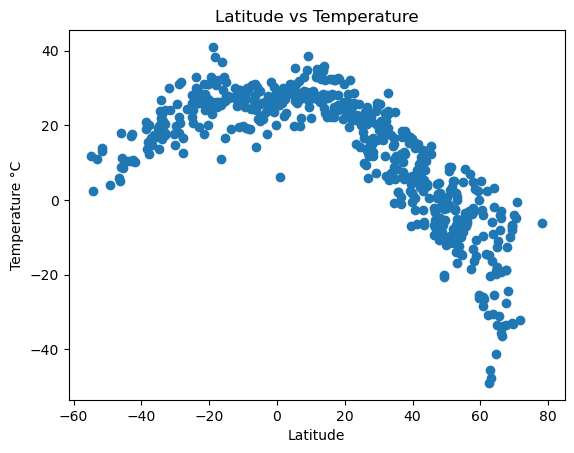

In [9]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
# Incorporate the other graph properties
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature °C')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

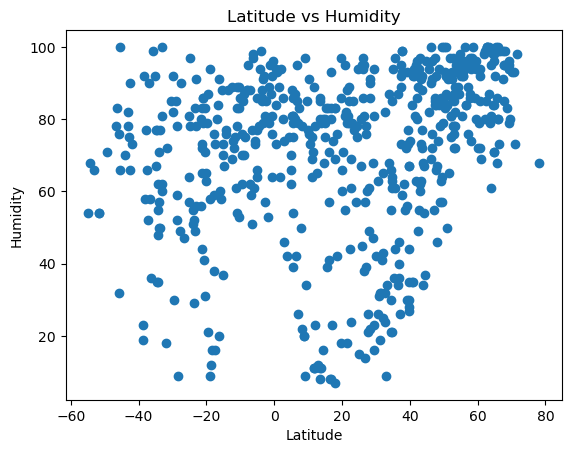

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
# Incorporate the other graph properties
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

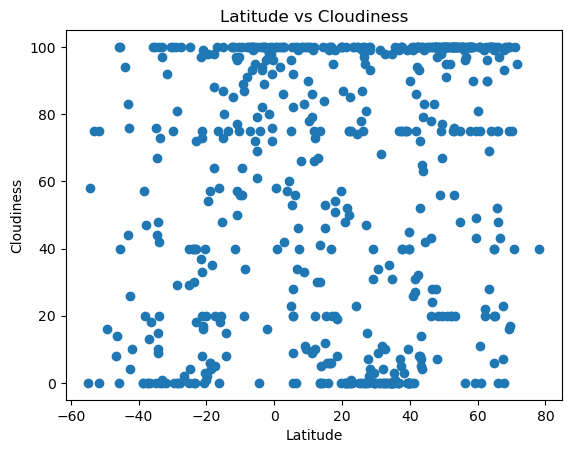

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])
# Incorporate the other graph properties
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

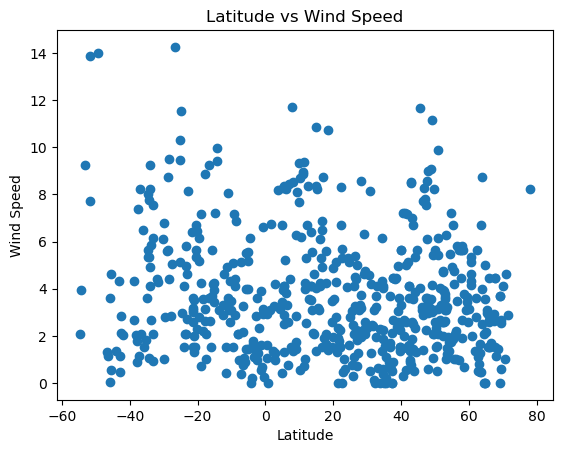

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def myRegression(myX,myY):
    mySlope, myInt, myR, myP, myStdErr = linregress(myX, myY)
    myLine = mySlope * myX +myInt
    myLineStr = f'y = {mySlope:.2f}x + {myInt:.2f}'
    return myLine, myLineStr, myR

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=pd.DataFrame(city_data_df[city_data_df['Lat']>=0])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Hamilton,39.1834,-84.5333,2.47,93,75,2.57,US,1701692744
5,Mount Pearl,47.5166,-52.7813,1.19,86,100,3.60,CA,1701692752
6,Iqaluit,63.7506,-68.5145,-9.15,79,100,6.69,CA,1701692753
7,Kharkhorin,47.1975,102.8238,0.45,55,83,7.81,MN,1701692754
9,Isfana,39.8386,69.5306,6.31,44,45,1.51,KG,1701692755


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=pd.DataFrame(city_data_df[city_data_df['Lat']<0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Edinburgh Of The Seven Seas,-37.0676,-12.3116,15.72,90,13,8.25,SH,1701692749
2,Adamstown,-25.0660,-130.1015,22.29,81,29,5.12,PN,1701692750
3,Punta Arenas,-53.1500,-70.9167,11.06,66,75,9.26,CL,1701692751
4,Sao Joao Da Barra,-21.6403,-41.0511,31.05,80,97,6.40,BR,1701692752
8,Gurupi,-11.7292,-49.0686,25.09,72,100,1.52,BR,1701692755


###  Temperature vs. Latitude Linear Regression Plot

The R value for Latitude vs Temperature is -0.88


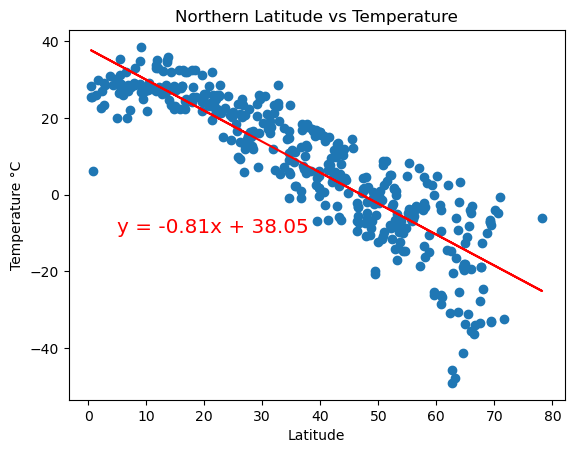

In [16]:
# Linear regression on Northern Hemisphere
nLine, nString, nR = myRegression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'],nLine,"-", color='r')
plt.text(5, -10, f'{nString}', c='r', fontsize = 'x-large')
plt.title('Northern Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature °C')
print(f'The R value for Latitude vs Temperature is {nR :.2f}')
plt.show()

The R value for Latitude vs Temperature is 0.65


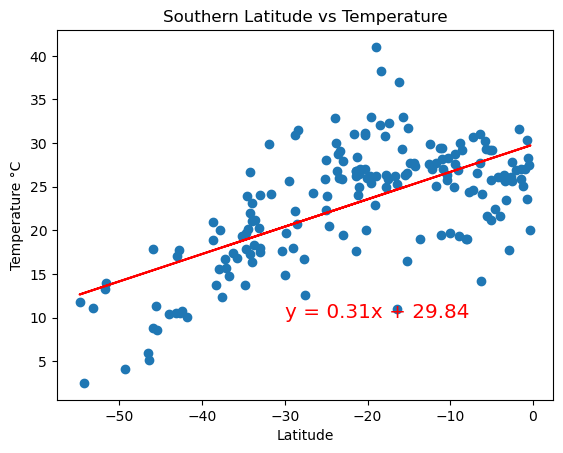

In [17]:
# Linear regression on Southern Hemisphere
nLine, nString, nR = myRegression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'],nLine,"-", color='r')
plt.text(-30, 10, f'{nString}', c='r', fontsize = 'x-large')
plt.title('Southern Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature °C')
print(f'The R value for Latitude vs Temperature is {nR :.2f}')
plt.show()

**Discussion about the linear relationship:** When comparing the realationship of temperature and latitude between the northern and southern hemispheres it is important to note that in the northern hemisphere latititude increases as it moves further away from the equator where as it decreases as it moves away from the equator.  As a result we see a strong negative relationship in the Northern hemisphere as indicated by the negative Pearson Co-efficient of __-0.88__.  This indicates temperature drops we move further from the equator. In the Southern hemisphere we see the same behaviour as indicated by the moderate positive value of the Pearson Co-efficient of __0.65__.  when looking at the Southern hemisphere indicating temperature increases as the latitiude increases from the south pole.  The weaker relationship in the southern hemisphere is a bit of a surprise.  It may be the result of the higher prevlance of ocean water in this hemisphere when compared to the Northern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The R value for Latitude vs Humidity is 0.39


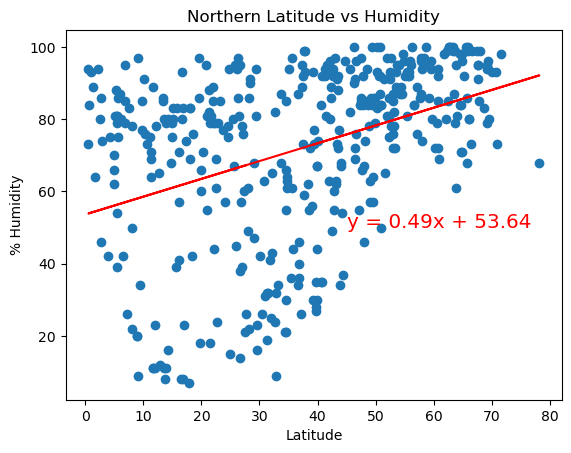

In [18]:
# Northern Hemisphere
nLine, nString, nR = myRegression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'],nLine,"-", color='r')
plt.text(45, 50, f'{nString}', c='r', fontsize = 'x-large')
plt.title('Northern Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
print(f'The R value for Latitude vs Humidity is {nR :.2f}')
plt.show()

The R value for Latitude vs Humidity is 0.24


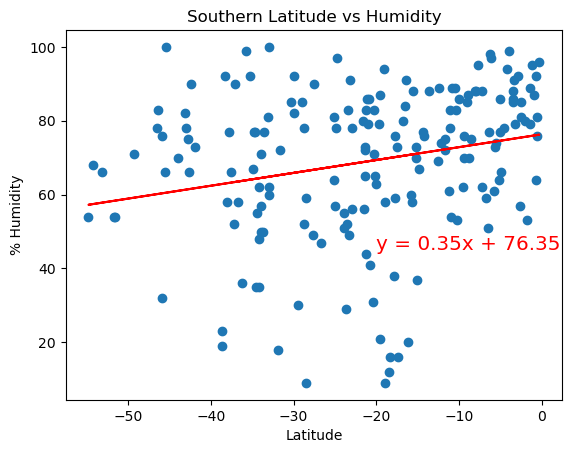

In [19]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
nLine, nString, nR = myRegression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'],nLine,"-", color='r')
plt.text(-20, 45, f'{nString}', c='r', fontsize = 'x-large')
plt.title('Southern Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
print(f'The R value for Latitude vs Humidity is {nR :.2f}')
plt.show()

**Discussion about the linear relationship:** The Pearson co-efficient of 0.39 in the northern Hemisphere suggests a very weak realtionship between latitude and humidity.  As we are looking at only 1 day worth of data caution should be taken as subsequent sampling may not indicate the a realtionship at all.  The Pearson value of 0.24 in the Southern hemisphere indicates no relationship between humidity and latitdue.

### Cloudiness vs. Latitude Linear Regression Plot

The R value for Latitude vs Cloudiness is 0.20


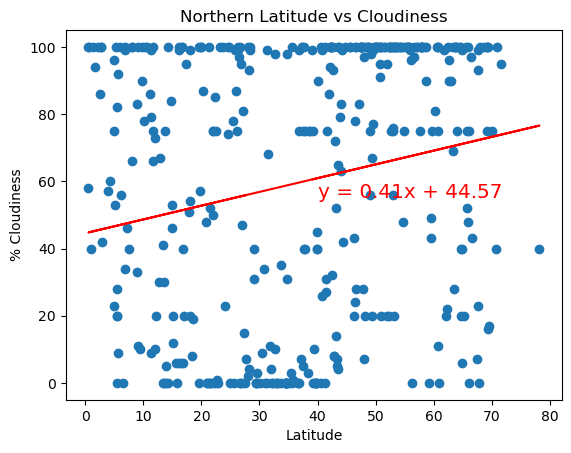

In [20]:
# Northern Hemisphere
nLine, nString, nR = myRegression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'],nLine,"-", color='r')
plt.text(40, 55, f'{nString}', c='r', fontsize = 'x-large')
plt.title('Northern Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
print(f'The R value for Latitude vs Cloudiness is {nR :.2f}')
plt.show()

The R value for Latitude vs Cloudiness is 0.43


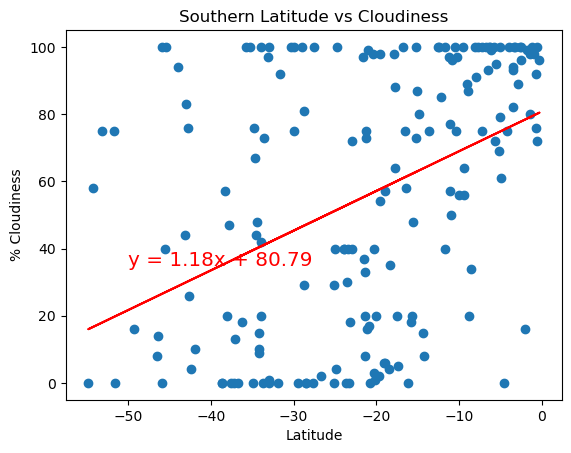

In [21]:
# Southern Hemisphere
nLine, nString, nR = myRegression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'],nLine,"-", color='r')
plt.text(-50, 35, f'{nString}', c='r', fontsize = 'x-large')
plt.title('Southern Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
print(f'The R value for Latitude vs Cloudiness is {nR :.2f}')
plt.show()

**Discussion about the linear relationship:** Cloudiness shows no or a weak relationship with latitude given the very low Pearson correlation values of 0.20 and 0.43 respectively in the North and South hemispheres

### Wind Speed vs. Latitude Linear Regression Plot

The R value for Latitude vs Wind Speed is -0.13


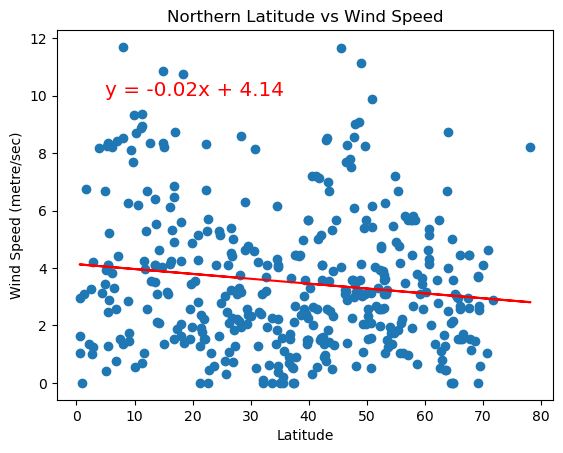

In [24]:
# Northern Hemisphere
nLine, nString, nR = myRegression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'],nLine,"-", color='r')
plt.text(5, 10, f'{nString}', c='r', fontsize = 'x-large')
plt.title('Northern Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (metre/sec)')
print(f'The R value for Latitude vs Wind Speed is {nR :.2f}')
plt.show()

The R value for Latitude vs Wind Speed is -0.23


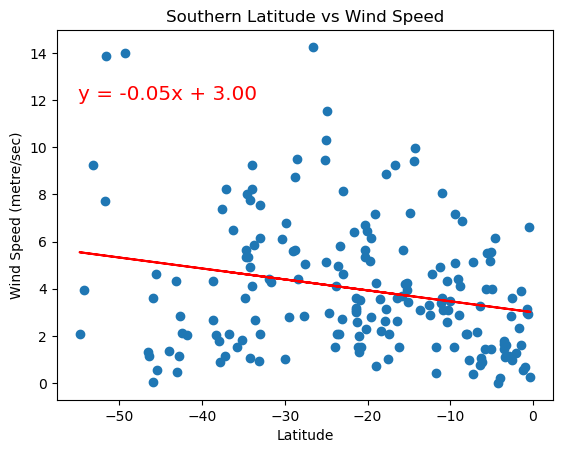

In [25]:
# Southern Hemisphere
nLine, nString, nR = myRegression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'],nLine,"-", color='r')
plt.text(-55, 12, f'{nString}', c='r', fontsize = 'x-large')
plt.title('Southern Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (metre/sec)')
print(f'The R value for Latitude vs Wind Speed is {nR :.2f}')
plt.show()

**Discussion about the linear relationship:** Similar to humidity, the realationship of windspeed to humidity is non-existent in the Northern hemisphere and very weak in the Southern hemisphere.  As evidenced by the Pearson co-efficients of -0.13 in the North and -0.23 in the South.  Caution should be taken to assume a relationship exists in the Southern hemisphere given the low R value.